<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/ML-Practice/blob/main/heart_disease_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.

## <b>Machine learning and artificial intelligence is going to have a dramatic impact on the health field; as a result, familiarizing yourself with the data processing techniques appropriate for numerical health data and the most widely used algorithms for classification tasks is an incredibly valuable use of your time! </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the heart.csv data, clean the data and normalise the features.
* ### Split the data into train and test. 
* ### Use the keras package to build the model. The code to build such a model is provided below:
* ### Evaluate the model across various metrics. 





## Explore the keras package to understand how the code works

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


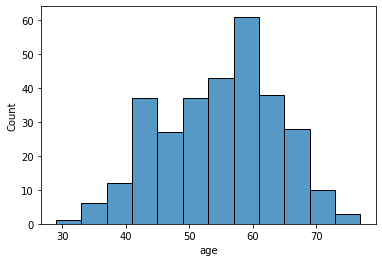

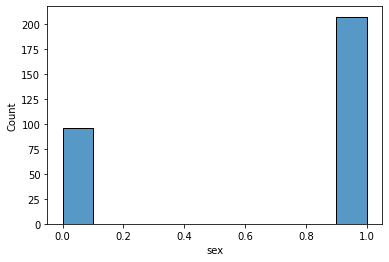

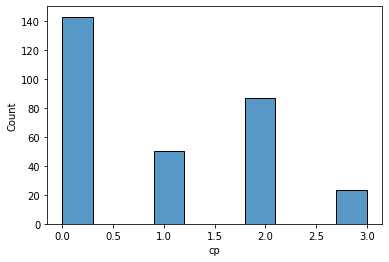

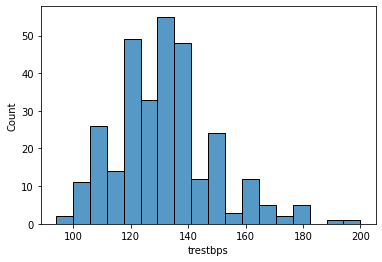

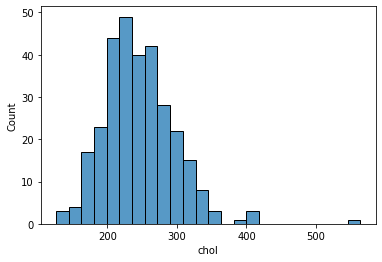

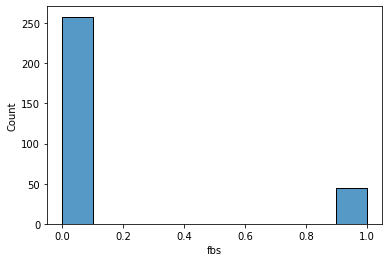

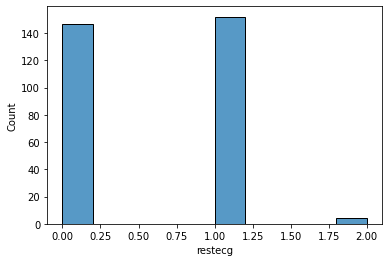

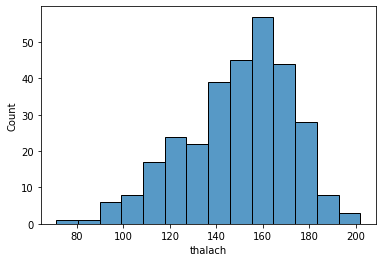

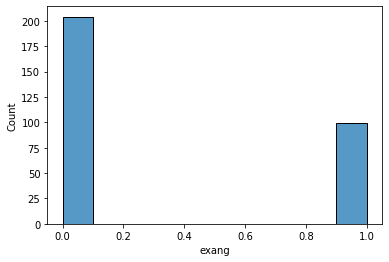

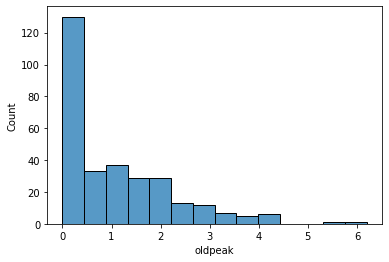

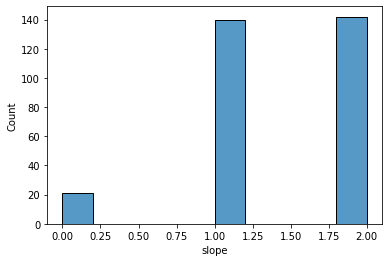

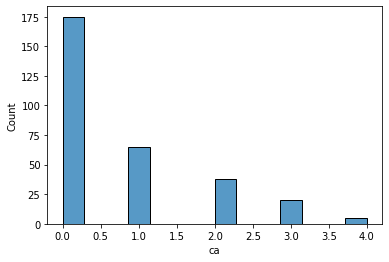

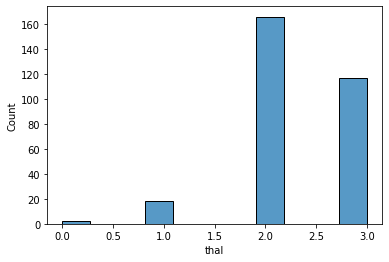

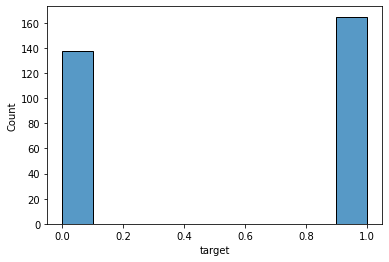

In [5]:
for col in list(df.columns):
  ax=plt.figure().gca()
  sns.histplot(df[col],ax=ax)
  plt.show

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('target',axis=1)
y=df.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# input_dim= number of columns

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    # adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10000, batch_size=100,verbose=0)

In [14]:
# evaluate the keras model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.6246 - accuracy: 0.7705


[0.6245609521865845, 0.7704917788505554]